# Проверка гипотез с использованием стат. критериев

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as ss
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy.stats import spearmanr

In [3]:
data = pd.read_csv('data_cleaned.csv')

In [4]:
data.head()

,Unnamed: 0,idno,agea,rlgdgr,polintr,sclmeet,happy,cntry,nwspol,pplfair,...,actrolga,cptppola,trstprl,trstlgl,trstplc,trstplt,vote,stfeco,stfdem,stfedu
0,1,50030,21.0,0.0,2.0,7.0,9.0,AT,90.0,0.0,...,2.0,2.0,6.0,6.0,4.0,1.0,1.0,2.0,7.0,10.0
1,2,50057,53.0,8.0,2.0,4.0,9.0,AT,30.0,9.0,...,4.0,3.0,7.0,5.0,8.0,4.0,1.0,6.0,6.0,5.0
2,3,50106,78.0,6.0,3.0,6.0,7.0,AT,15.0,6.0,...,2.0,3.0,5.0,6.0,9.0,3.0,2.0,4.0,6.0,5.0
3,4,50145,64.0,1.0,2.0,5.0,9.0,AT,60.0,3.0,...,1.0,3.0,6.0,8.0,8.0,5.0,1.0,6.0,8.0,9.0
4,5,50158,59.0,3.0,2.0,6.0,8.0,AT,120.0,8.0,...,3.0,3.0,3.0,5.0,7.0,5.0,1.0,4.0,3.0,3.0


## Счастье и доверие к власти

- H0: Уровень доверия к власти не влияет на уровень счастья человека
- H1: Уровень доверия к власти оказывает влияние на уровень счастья

In [5]:
# Описательные статистики

stats = data.groupby('trstlgl')['happy'].agg(['mean', 'std', 'count']).reset_index()
print("\nОписательные статистики по группам:")
print(stats.round(2))


Описательные статистики по группам:
    trstlgl  mean   std  count
0       0.0  7.25  2.18    503
1       1.0  6.94  2.16    271
2       2.0  7.29  1.98    531
3       3.0  7.22  1.79    824
4       4.0  7.40  1.67    903
5       5.0  7.64  1.65   1570
6       6.0  7.66  1.47   1383
7       7.0  7.82  1.36   2067
8       8.0  8.01  1.32   2334
9       9.0  8.30  1.30   1308
10     10.0  8.54  1.52    548


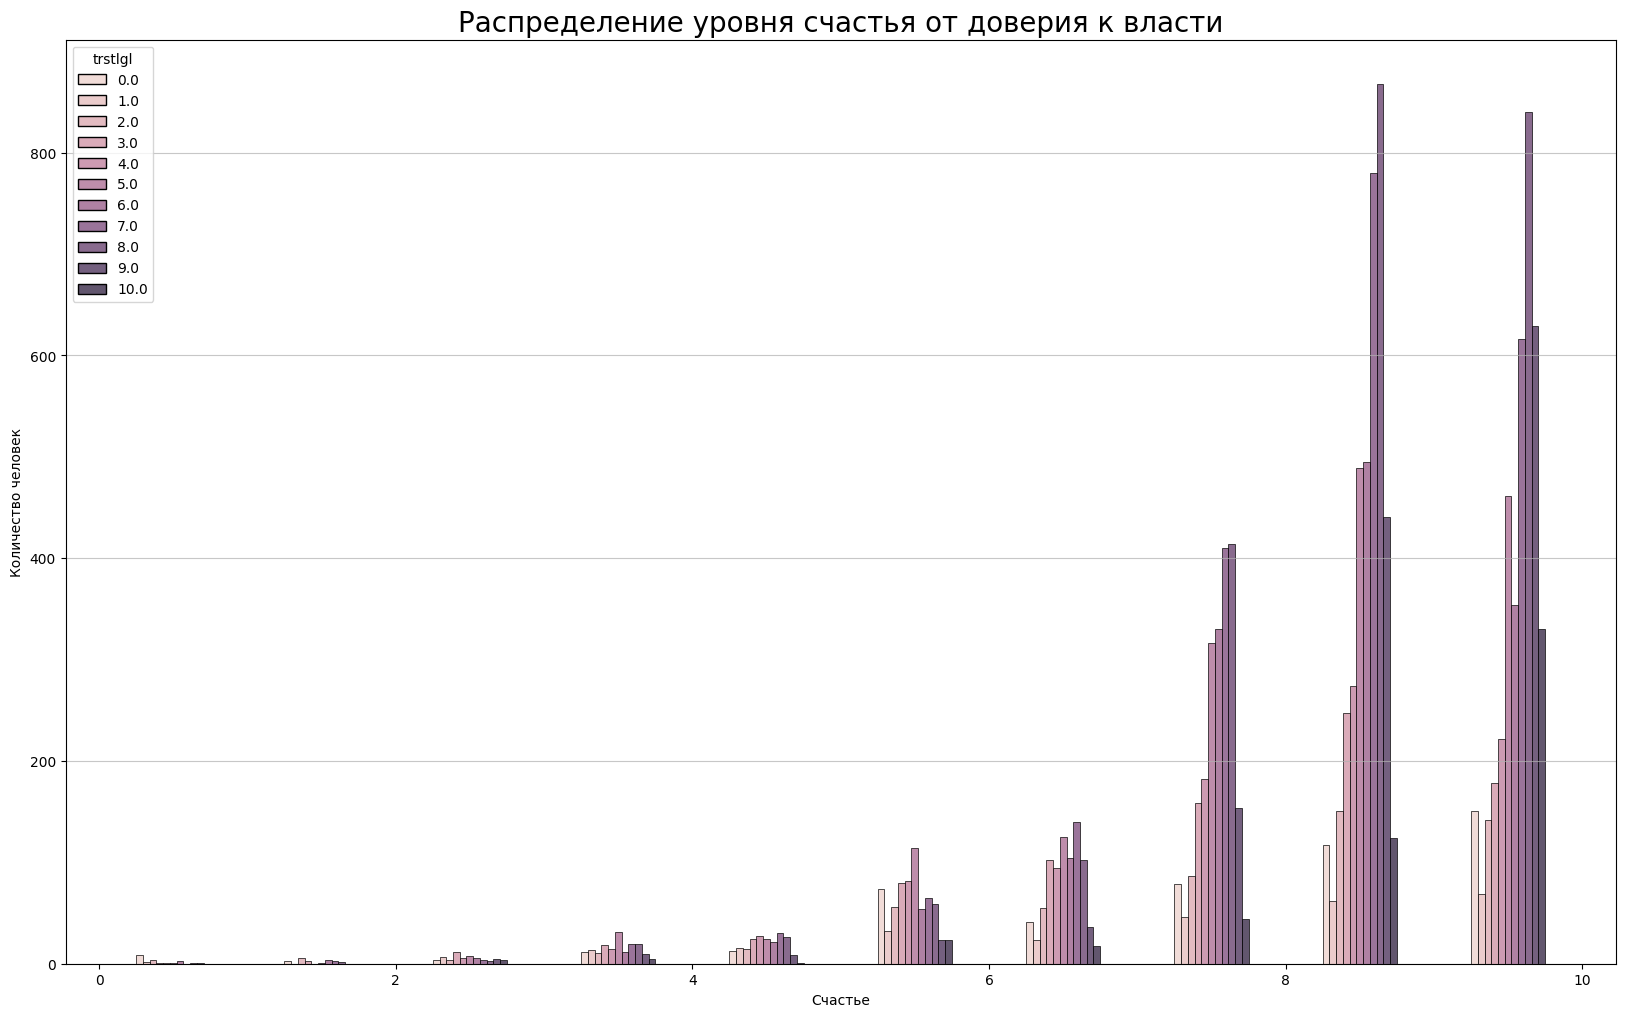

In [6]:
# Распределение по разным категориям
plt.figure(figsize=(20, 12))
sns.histplot(data=data, x='happy', bins=10, hue='trstlgl', multiple="dodge",shrink=.5)

plt.title("Распределение уровня счастья от доверия к власти", fontsize=20)
plt.xlabel("Счастье")
plt.ylabel("Количество человек")
plt.grid(axis='y', alpha=0.7)
plt.show()

In [7]:
# Расчет корреляции и её интерпретация

corr, p_value = spearmanr(data['trstlgl'], data['happy'])

print(f"Коэффициент корреляции Спирмена: {corr:.3f}")
print(f"P-значение: {p_value:.4f}")

if p_value < 0.05:
    print("Корреляция статистически значима (p < 0.05)")
else:
    print("Корреляция незначима (p >= 0.05)")


Коэффициент корреляции Спирмена: 0.221
P-значение: 0.0000
Корреляция статистически значима (p < 0.05)


### Вывод
Отвергаем нулевую гипотезу - **доверие к власти влияет на уровень счастья**

## Счастье и уровень сна

- H0: Качество сна на прошлой неделе не влияет на уровень счастья человека
- H1: Качество сна оказывает влияние на уровень счастья

In [8]:
# Описательные статистики

stats = data.groupby('slprl')['happy'].agg(['mean', 'std', 'count']).reset_index()
print("\nОписательные статистики по группам:")
print(stats.round(2))


Описательные статистики по группам:
   slprl  mean   std  count
0    1.0  8.02  1.42   5250
1    2.0  7.76  1.48   4880
2    3.0  7.26  1.86   1413
3    4.0  6.85  2.27    699


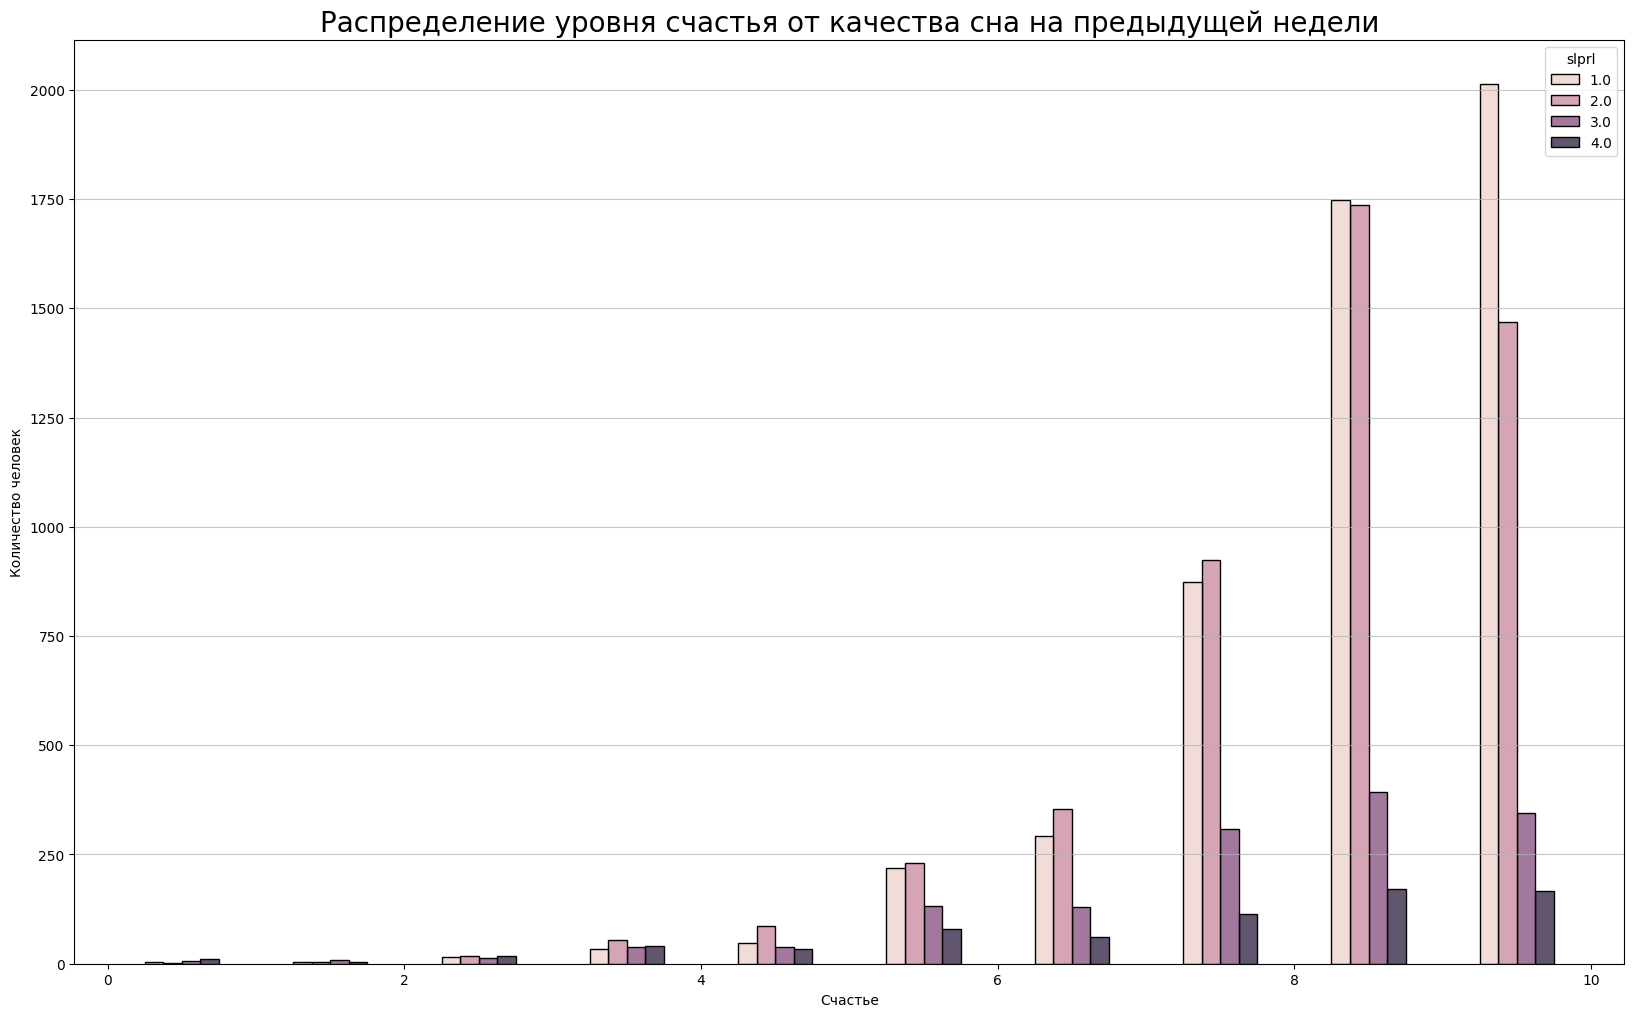

In [9]:
# Распределение по разным категориям
plt.figure(figsize=(20, 12))
sns.histplot(data=data, x='happy', bins=10, hue='slprl', multiple="dodge",shrink=.5)

plt.title("Распределение уровня счастья от качества сна на предыдущей недели", fontsize=20)
plt.xlabel("Счастье")
plt.ylabel("Количество человек")
plt.grid(axis='y', alpha=0.7)
plt.show()

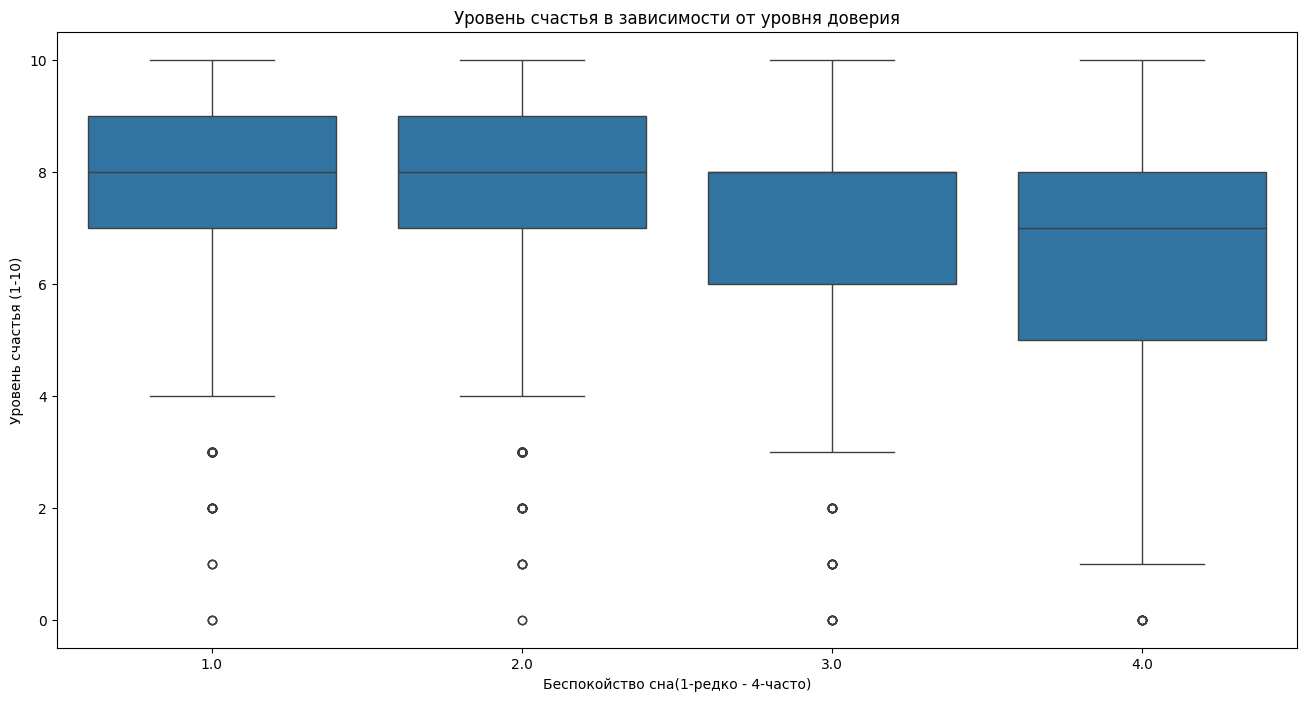

In [10]:
# Боксплот
plt.figure(figsize=(16, 8))
sns.boxplot(x='slprl', y='happy', data=data)
plt.title('Уровень счастья в зависимости от уровня доверия')
plt.xlabel('Беспокойство сна(1-редко - 4-часто)')
plt.ylabel('Уровень счастья (1-10)')
plt.show()

In [11]:
# Расчет корреляции и её интерпретация

corr, p_value = spearmanr(data['slprl'], data['happy'])

print(f"Коэффициент корреляции Спирмена: {corr:.3f}")
print(f"P-значение: {p_value:.4f}")

if p_value < 0.05:
    print("Корреляция статистически значима (p < 0.05)")
else:
    print("Корреляция незначима (p >= 0.05)")

Коэффициент корреляции Спирмена: -0.164
P-значение: 0.0000
Корреляция статистически значима (p < 0.05)


### Вывод
Отвергаем нулевую гипотезу - **беспокойный сон отрицательно влияет на уровень счастья**

## Счастье и важность быть признанным в обществе

- H0: Необходимость признания человека обществом не влияет на его уровень счастья
- H1: Необходимость признания влияние на уровень счастья

In [12]:
# Описательные статистики

stats = data.groupby('ipsucesa')['happy'].agg(['mean', 'std', 'count']).reset_index()
print("\nОписательные статистики по группам:")
print(stats.round(2))


Описательные статистики по группам:
   ipsucesa  mean   std  count
0       1.0  7.85  1.71    972
1       2.0  7.73  1.59   2638
2       3.0  7.77  1.52   3075
3       4.0  7.77  1.55   2428
4       5.0  7.73  1.64   2371
5       6.0  7.82  1.72    758


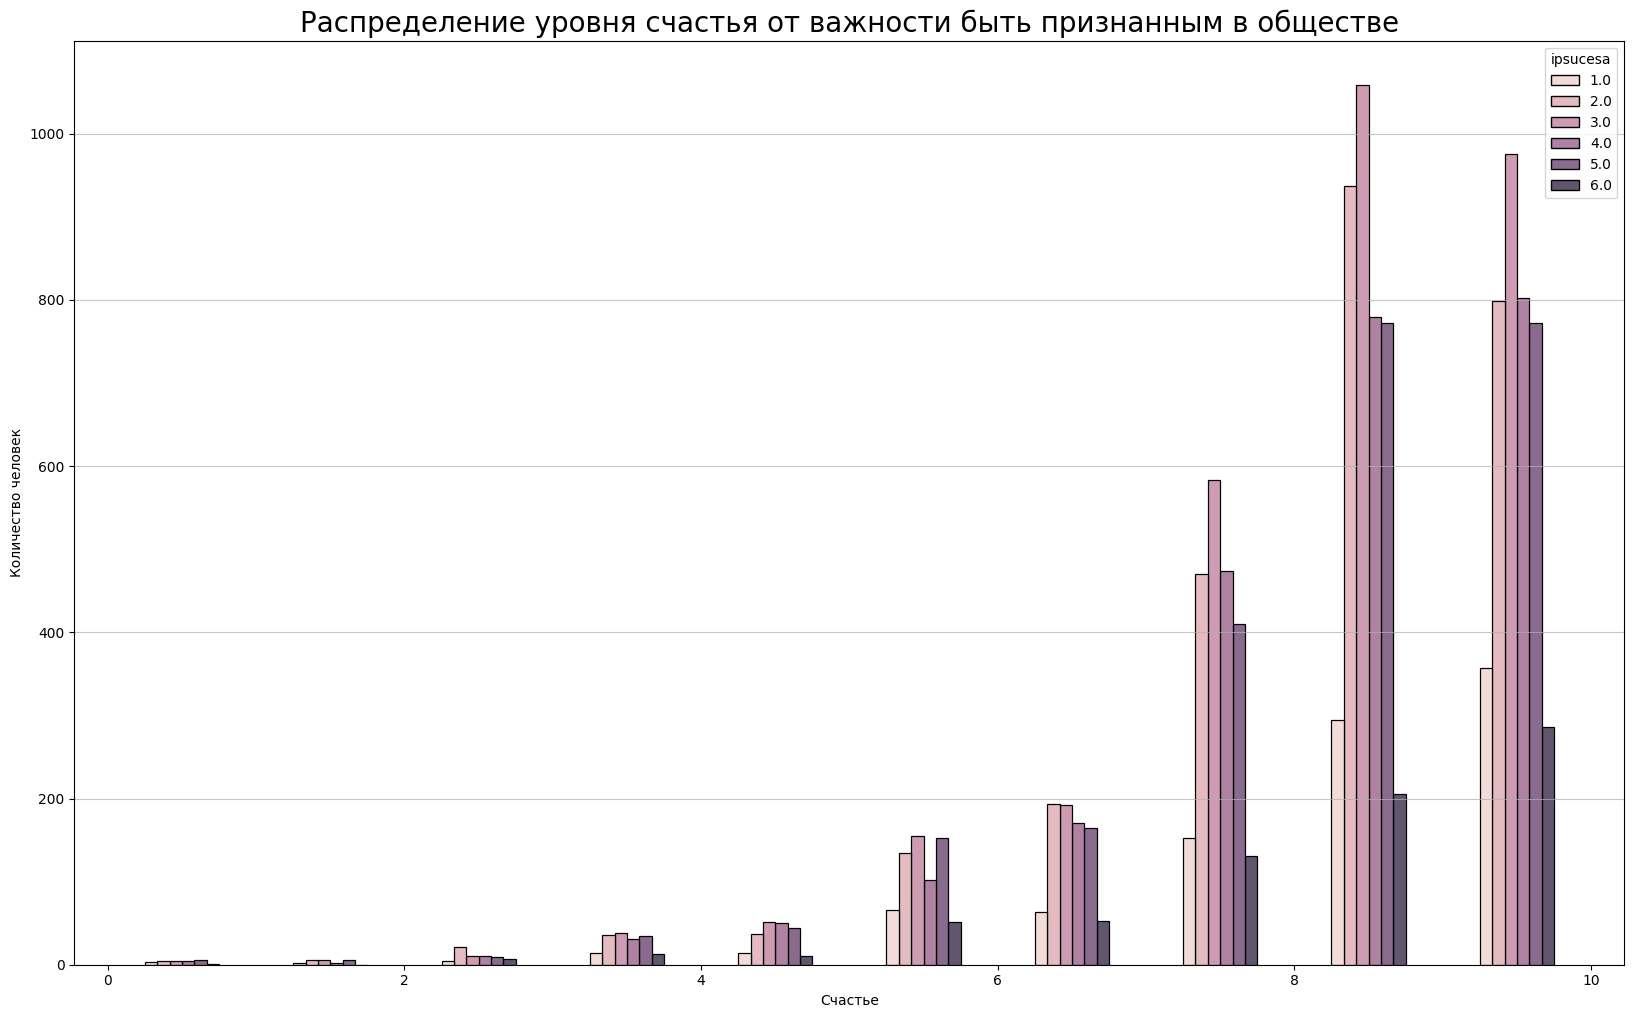

In [13]:
plt.figure(figsize=(20, 12))
sns.histplot(data=data, x='happy', bins=10, hue='ipsucesa', multiple="dodge",shrink=.5)

plt.title("Распределение уровня счастья от важности быть признанным в обществе", fontsize=20)
plt.xlabel("Счастье")
plt.ylabel("Количество человек")
plt.grid(axis='y', alpha=0.7)
plt.show()

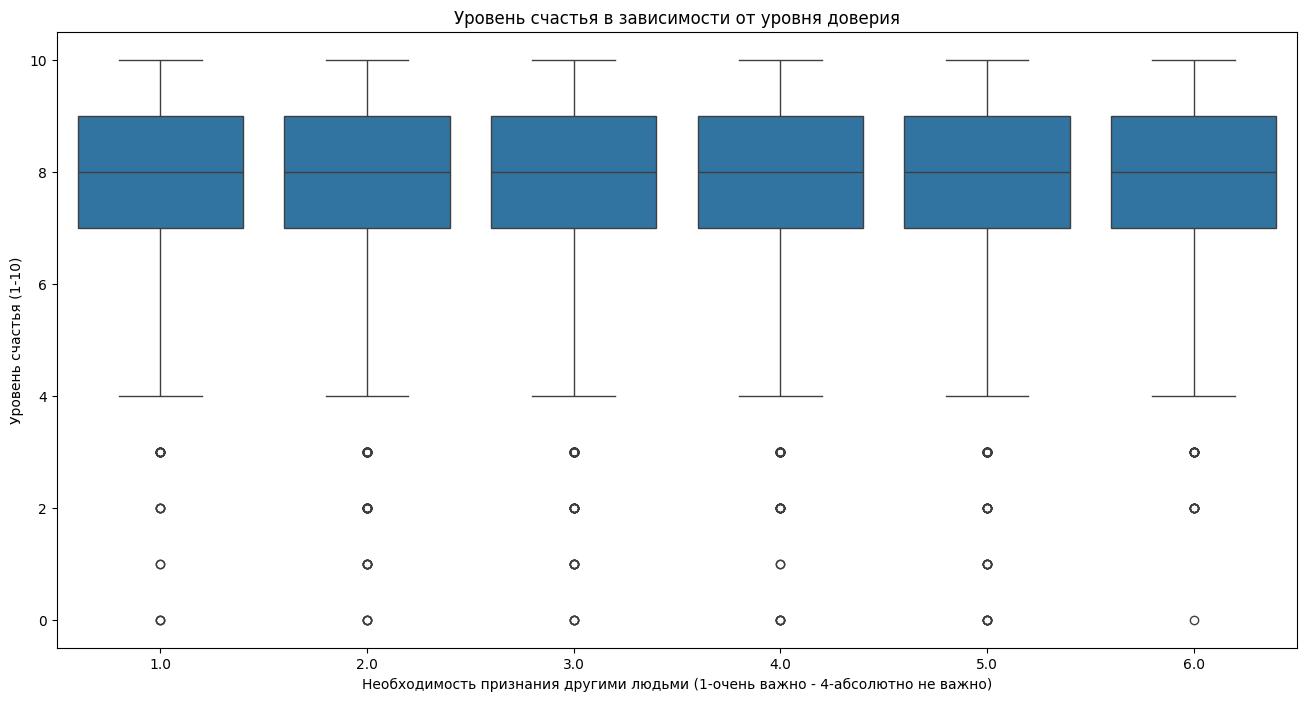

In [14]:
# Боксплот
plt.figure(figsize=(16, 8))
sns.boxplot(x='ipsucesa', y='happy', data=data)
plt.title('Уровень счастья в зависимости от уровня доверия')
plt.xlabel('Необходимость признания другими людьми (1-очень важно - 4-абсолютно не важно)')
plt.ylabel('Уровень счастья (1-10)')
plt.show()

In [15]:
# Расчет корреляции и её интерпретация

corr, p_value = spearmanr(data['ipsucesa'], data['happy'])

print(f"Коэффициент корреляции Спирмена: {corr:.3f}")
print(f"P-значение: {p_value:.4f}")

if p_value < 0.05:
    print("Корреляция статистически значима (p < 0.05)")
else:
    print("Корреляция незначима (p >= 0.05)")

Коэффициент корреляции Спирмена: 0.000
P-значение: 0.9999
Корреляция незначима (p >= 0.05)


### Вывод
Принимаем нулевую гипотезу - **важность признания не оказывает влияние на уровень счастья**

## Счастье и возраст

- H0: возраст не влияет на уровень счастье
- H1: возраст влияет на уровень счастье

Text(0.5, 1.0, 'Разброс значений')

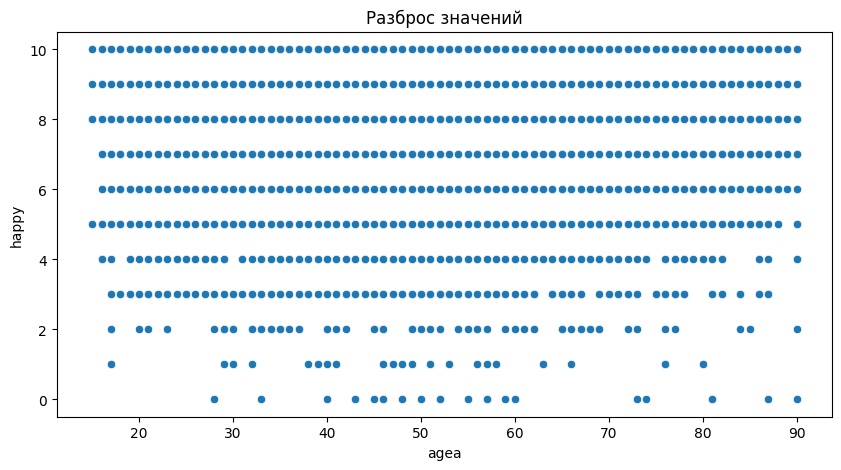

In [16]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='agea', y='happy', data=data)
plt.title('Разброс значений')

In [17]:
happy = np.array(data['happy'])
age = np.array(data['agea'])

happy_test = ss.shapiro(happy)
age_test = ss.shapiro(age)

print("\nПроверка нормальности распределения (тест Шапиро-Уилка)")
print(f"Уровень счастья: W = {happy_test.statistic:.3f}, p-value = {happy_test.pvalue:.3e}")
print(f"Возраст:        W = {age_test.statistic:.3f}, p-value = {age_test.pvalue:.3e}")



Проверка нормальности распределения (тест Шапиро-Уилка)
Уровень счастья: W = 0.893, p-value = 6.952e-68
Возраст:        W = 0.981, p-value = 5.210e-37


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12242.
  res = hypotest_fun_out(*samples, **kwds)


In [18]:
# поскольку данные распределены ненормально, посмотрим корреляцию Спирмена

spearman_corr, spearman_p = ss.spearmanr(data['agea'], data['happy'])
print(f"Корреляция Спирмена: rho={spearman_corr:.3f}, p={spearman_p:.3f}")

Корреляция Спирмена: rho=0.032, p=0.000


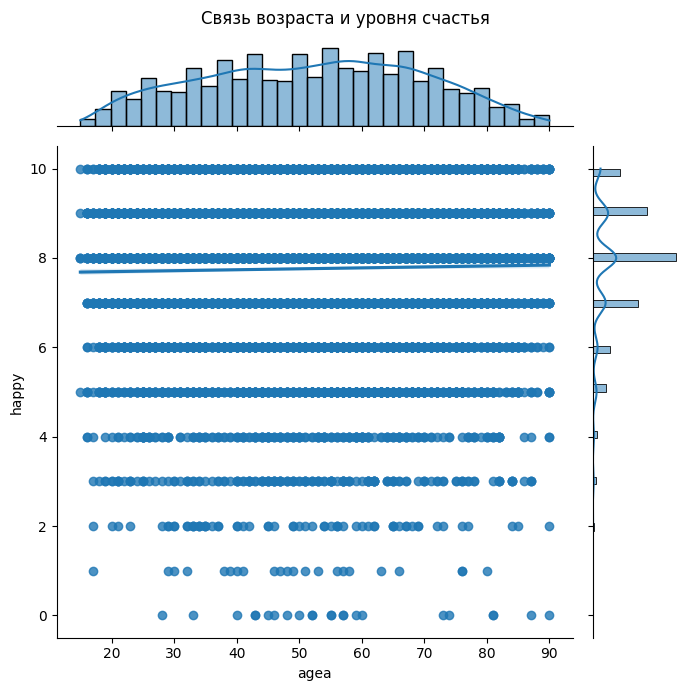

In [19]:
sns.jointplot(x='agea', y='happy', data=data, kind='reg', height=7)
plt.suptitle("Связь возраста и уровня счастья")
plt.tight_layout()

**Интерпретация**

- очень слабая связь (0.032), однако она стат. значима (p-value = 0)
- возможно, это объясняется большим набором данных (> 1000)
- практический вывод о том, что возраст сильно влияет на уровень счастья, сделать нельзя

=> попробуем разделить возраст на категории и посмотреть, будет ли более явная связь при таком подходе

<ipython-input-20-e67566d6bce9>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(


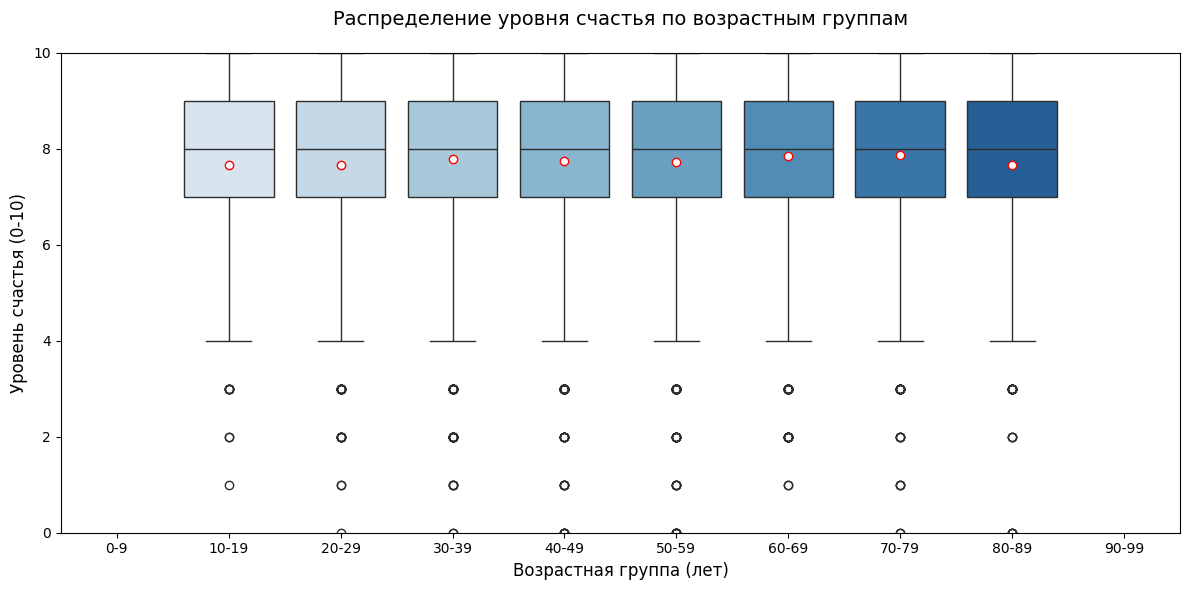

In [20]:
data['age_group'] = pd.cut(
    data['agea'],
    bins=np.arange(0, 101, 10),
    labels=[f'{i}-{i+9}' for i in range(0, 100, 10)]
)

plt.figure(figsize=(12, 6))

boxplot = sns.boxplot(
    x='age_group',
    y='happy',
    data=data,
    palette="Blues",
    showmeans=True,   # средние значения
    meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"red"}
)

plt.title('Распределение уровня счастья по возрастным группам', fontsize=14, pad=20)
plt.xlabel('Возрастная группа (лет)', fontsize=12)
plt.ylabel('Уровень счастья (0-10)', fontsize=12)
plt.ylim(0, 10)

plt.tight_layout()
plt.show()

<ipython-input-21-f4738bd67e74>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(


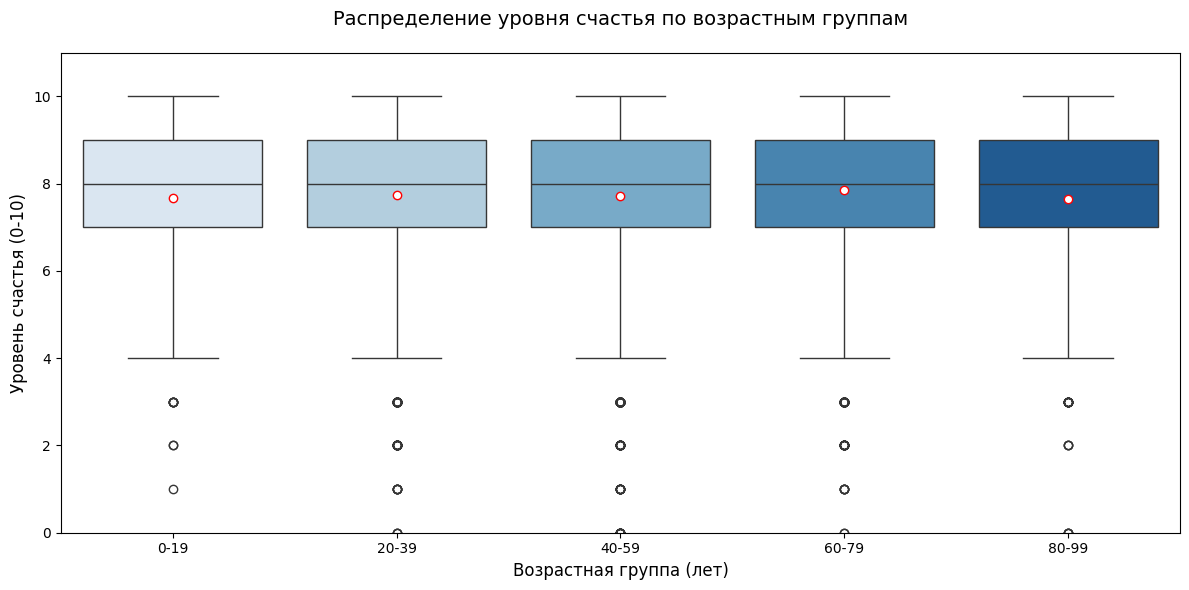

In [21]:
data['age_group'] = pd.cut(
    data['agea'],
    bins=np.arange(0, 101, 20),
    labels=[f'{i}-{i+19}' for i in range(0, 100, 20)]
)

plt.figure(figsize=(12, 6))

boxplot = sns.boxplot(
    x='age_group',
    y='happy',
    data=data,
    palette="Blues",
    showmeans=True,   # средние значения
    meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"red"}
)

plt.title('Распределение уровня счастья по возрастным группам', fontsize=14, pad=20)
plt.xlabel('Возрастная группа (лет)', fontsize=12)
plt.ylabel('Уровень счастья (0-10)', fontsize=12)
plt.ylim(0, 11)

plt.tight_layout()
plt.show()

In [22]:
data['age_group'].unique()

['20-39', '40-59', '60-79', '80-99', '0-19']
Categories (5, object): ['0-19' < '20-39' < '40-59' < '60-79' < '80-99']

In [23]:
# поскольку данные ненормально распределены, посмотрим тест Краскала-Уоллиса

h_val, h_p = ss.kruskal(
    data[data['age_group'] == '0-19']['happy'],
    data[data['age_group'] == '20-39']['happy'],
    data[data['age_group'] == '40-59']['happy'],
    data[data['age_group'] == '60-79']['happy'],
    data[data['age_group'] == '80-99']['happy']
)
print(f"H-значение: {h_val:.3f}, p-value: {h_p:.3f}")

H-значение: 19.563, p-value: 0.001


In [24]:
# посмотрим попарные сравнения между группами, чтобы понять, между какими есть значимые отличия
import scikit_posthocs as sp

posthoc = sp.posthoc_conover(data, val_col='happy', group_col='age_group', p_adjust='fdr_bh')
display(posthoc.style.background_gradient(cmap='Blues_r').format("{:.3f}"))

,0-19,20-39,40-59,60-79,80-99
0-19,1.000,0.814,0.801,0.156,0.814
20-39,0.814,1.000,0.738,0.001,0.814
40-59,0.801,0.738,1.000,0.004,0.946
60-79,0.156,0.001,0.004,1.000,0.222
80-99,0.814,0.814,0.946,0.222,1.000


### Выводы

Тест Краскала-Уоллиса показывает **статистически значимое влияние возраста на уровень счастья** (p-value = 0.001), особо заметны различия между группами: 20-39 и 60-79; 40-59 и 60-70

## Счастье и пол

- H0: пол не влияет на уровень счастья
- H1: пол влияет на уровень счастья

In [25]:
data['gndr'].unique()

array([0, 1])

<ipython-input-26-cc06dcb10b2b>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gndr', y='happy', data=data, palette=['blue', 'pink'], width=0.4)


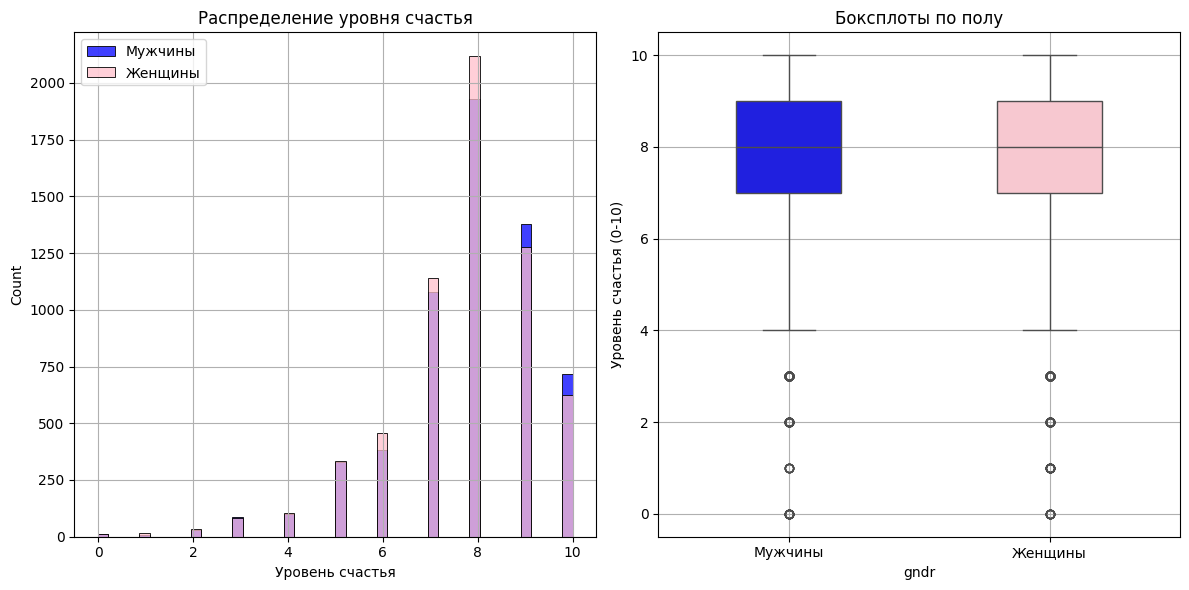

In [26]:
plt.figure(figsize=(12, 6))

# распределения
plt.subplot(1, 2, 1)
sns.histplot(data=data[data['gndr'] == 0]['happy'], label='Мужчины', color='blue')
sns.histplot(data=data[data['gndr'] == 1]['happy'], label='Женщины', color='pink')
plt.title('Распределение уровня счастья', fontsize=12)
plt.xlabel('Уровень счастья')
plt.legend()
plt.grid(True)

# боксплоты
plt.subplot(1, 2, 2)
sns.boxplot(x='gndr', y='happy', data=data, palette=['blue', 'pink'], width=0.4)
plt.title('Боксплоты по полу', fontsize=12)
plt.ylabel('Уровень счастья (0-10)')
plt.xticks(ticks=[0, 1], labels=['Мужчины', 'Женщины'])
plt.grid(True)

plt.tight_layout()
plt.show()

In [27]:
from scipy.stats import mannwhitneyu

group_0 = data[data['gndr'] == 0]['happy']
group_1 = data[data['gndr'] == 1]['happy']

stat, p = mannwhitneyu(group_0, group_1, alternative='two-sided')

print("Результат теста Манна-Уитни:")
print(f"U-статистика = {stat:.3f}, p-value = {p:.3f}")

Результат теста Манна-Уитни:
U-статистика = 19464833.000, p-value = 0.000


### Выводы

Результат теста Манна-Уитни говорит **о значимом отличии в распределениях уровня счастья мужчин и женщин** (p-value = 0). На графике заметно, что женщины чаще выбирают уровень счастье 6-8, в то время как мужчины чаще выбирают 9-10

## Счастье и уровень дохода

H0: чувство дохода семьи не влияет на уровень счастья

H1: чувство дохода семьи влияет на уровень счастья

Гипотеза: Чувство дохода семьи влияет на уровень счастья
--------------------------------------------------------

Описательные статистики по группам:
         mean   std  count
hincfel                   
1.0      8.18  1.32   5071
2.0      7.66  1.54   5356
3.0      6.99  1.90   1524
4.0      6.32  2.41    291


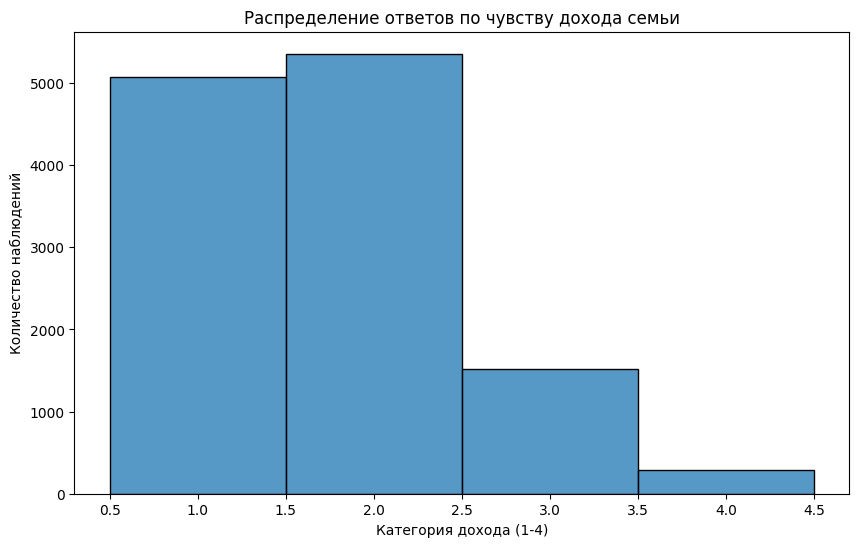


Корреляция Спирмена: -0.260
p-value: 0.0000
Корреляция статистически значима (p < 0.05)


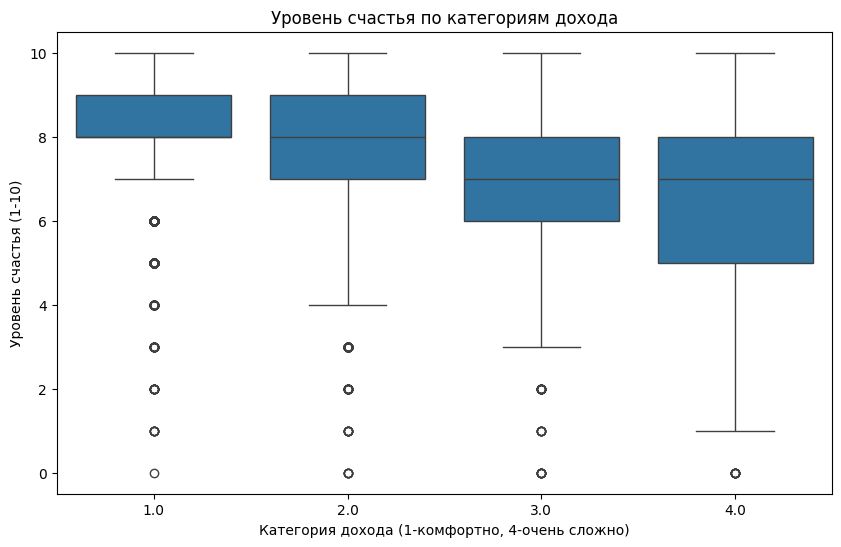


Дополнительная информация:

Корреляционная матрица (Спирмен):
         hincfel  happy
hincfel     1.00  -0.26
happy      -0.26   1.00


In [28]:
def test_income_happiness_hypothesis(df):
    print("Гипотеза: Чувство дохода семьи влияет на уровень счастья")
    print("--------------------------------------------------------")

    # Описательные статистики
    stats_table = df.groupby('hincfel')['happy'].agg(['mean', 'std', 'count'])
    print("\nОписательные статистики по группам:")
    print(stats_table.round(2))

    # Визуализация распределения hincfel
    plt.figure(figsize=(10, 6))
    sns.histplot(df['hincfel'], bins=4, discrete=True)
    plt.title('Распределение ответов по чувству дохода семьи')
    plt.xlabel('Категория дохода (1-4)')
    plt.ylabel('Количество наблюдений')
    plt.show()

    # Анализ корреляции (добавлен отсутствующий код)
    corr, p_value = ss.spearmanr(df['hincfel'], df['happy'])
    print(f"\nКорреляция Спирмена: {corr:.3f}")
    print(f"p-value: {p_value:.4f}")

    if p_value < 0.05:
        print("Корреляция статистически значима (p < 0.05)")
    else:
        print("Корреляция не статистически значима")

    # Boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='hincfel', y='happy', data=df)
    plt.title('Уровень счастья по категориям дохода')
    plt.xlabel('Категория дохода (1-комфортно, 4-очень сложно)')
    plt.ylabel('Уровень счастья (1-10)')
    plt.show()

    return corr, p_value

h1_corr, h1_p = test_income_happiness_hypothesis(data)

print("\nДополнительная информация:")
print("\nКорреляционная матрица (Спирмен):")
print(data[['hincfel', 'happy']].corr(method='spearman').round(2))

### Вывод
Корреляция между чувством дохода и счастьем: Коэффициент Спирмена: -0.26 (умеренная отрицательная связь) Связь статистически значима (p < 0.0001) Чем хуже финансовое положение, тем ниже уровень счастья.

## Счастье и кол-во членов семьи

- H0: количество людей в семье не влияет на уровень счастья
- H1: количество людей в семье влияет на уровень счастья

In [29]:
def test_family_size_happiness_hypothesis(df):
    print("\nГипотеза: Размер семьи влияет на уровень счастья")
    print("--------------------------------------------------")

    # Описательные статистики
    stats_table = df.groupby('hhmmb')['happy'].agg(['mean', 'std', 'count'])
    print("\nОписательные статистики по группам:")
    print(stats_table.round(2))

    # Визуализация
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='hhmmb', y='happy', data=df)
    plt.title('Уровень счастья в зависимости от размера семьи')
    plt.xlabel('Количество членов семьи')
    plt.ylabel('Уровень счастья (1-10)')
    plt.show()

    # Точечный график с трендом
    sns.regplot(
        x='hhmmb',
        y='happy',
        data=df,
        scatter_kws={'alpha': 0.3},
        line_kws={'color': 'red'},
        ci=95                        # 95% доверительный интервал
    )

    plt.title('Уровень счастья в зависимости от количества членов семьи', pad=20)
    plt.xlabel('Количество членов семьи')
    plt.ylabel('Уровень счастья (1-10)')

    # Убираем лишние значения по оси X
    plt.xlim(0, df['hhmmb'].max() + 1)

    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

    # Корреляция
    corr, p_value = ss.spearmanr(df['hhmmb'], df['happy'])
    print(f"\nКорреляция Спирмена: {corr:.3f}")
    print(f"p-value: {p_value:.4f}")

    if p_value < 0.05:
        print("Корреляция статистически значима (p < 0.05)")
    else:
        print("Корреляция не статистически значима")

    return corr, p_value


Гипотеза: Размер семьи влияет на уровень счастья
--------------------------------------------------

Описательные статистики по группам:
        mean   std  count
hhmmb                    
0.0     8.20  1.10      5
1.0     7.31  1.78   2735
2.0     7.92  1.50   4774
3.0     7.77  1.57   2022
4.0     7.92  1.47   1920
5.0     7.95  1.46    578
6.0     7.94  1.85    154
7.0     7.47  2.00     32
8.0     8.35  1.27     17
9.0     9.00  0.00      2
10.0    9.50  0.71      2
12.0   10.00   NaN      1


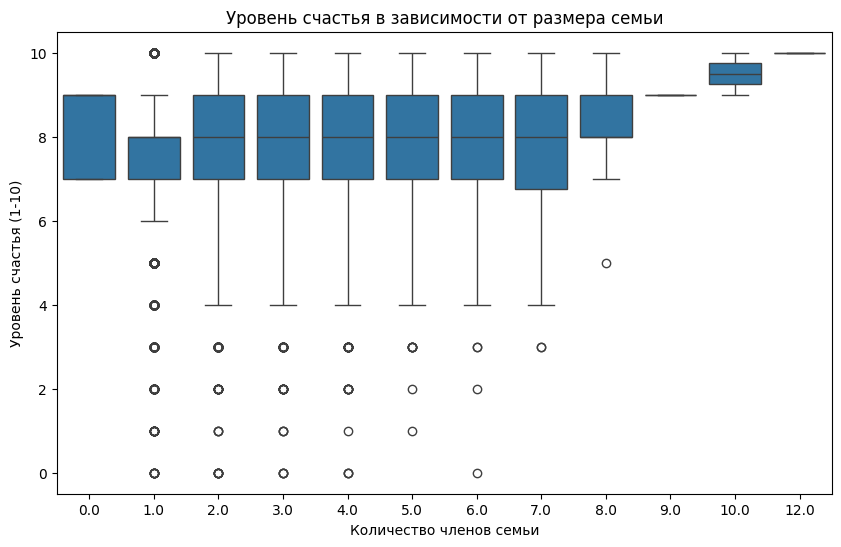

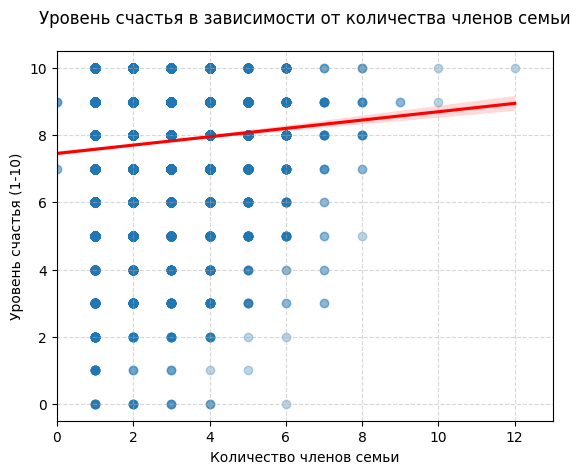


Корреляция Спирмена: 0.105
p-value: 0.0000
Корреляция статистически значима (p < 0.05)

Дополнительная информация:

Корреляционная матрица (Спирмен):
       hhmmb  happy
hhmmb   1.00   0.11
happy   0.11   1.00


In [30]:
h2_corr, h2_p = test_family_size_happiness_hypothesis(data)

print("\nДополнительная информация:")
print("\nКорреляционная матрица (Спирмен):")
print(data[['hhmmb', 'happy']].corr(method='spearman').round(2))

### Вывод
Корреляция между размером семьи и счастьем: Коэффициент Спирмена: 0.105 (слабая положительная связь) Связь статистически значима Большее количество членов семьи совсем немного связано с повышением уровня счастья

## Счастье и страны

- H0: страна не влияет на уровень счастья
- H1: страна влияет на уровень счастья

In [32]:
import pingouin as pg

normality_results = data.groupby('cntry')['happy'].apply(pg.normality).reset_index()
print(normality_results)

  cntry level_1         W          pval  normal
0    AT      AT  0.876465  2.929350e-34   False
1    BE      BE  0.866997  3.435172e-31   False
2    CH      CH  0.857489  3.880818e-29   False
3    CY      CY  0.920590  6.067963e-15   False
4    DE      DE  0.883194  2.480258e-36   False
5    ES      ES  0.905547  1.158471e-28   False
6    FI      FI  0.822439  3.338379e-36   False
7    FR      FR  0.920510  1.073854e-25   False
8    GB      GB  0.898691  2.288714e-24   False
9    GR      GR  0.910184  1.560870e-22   False


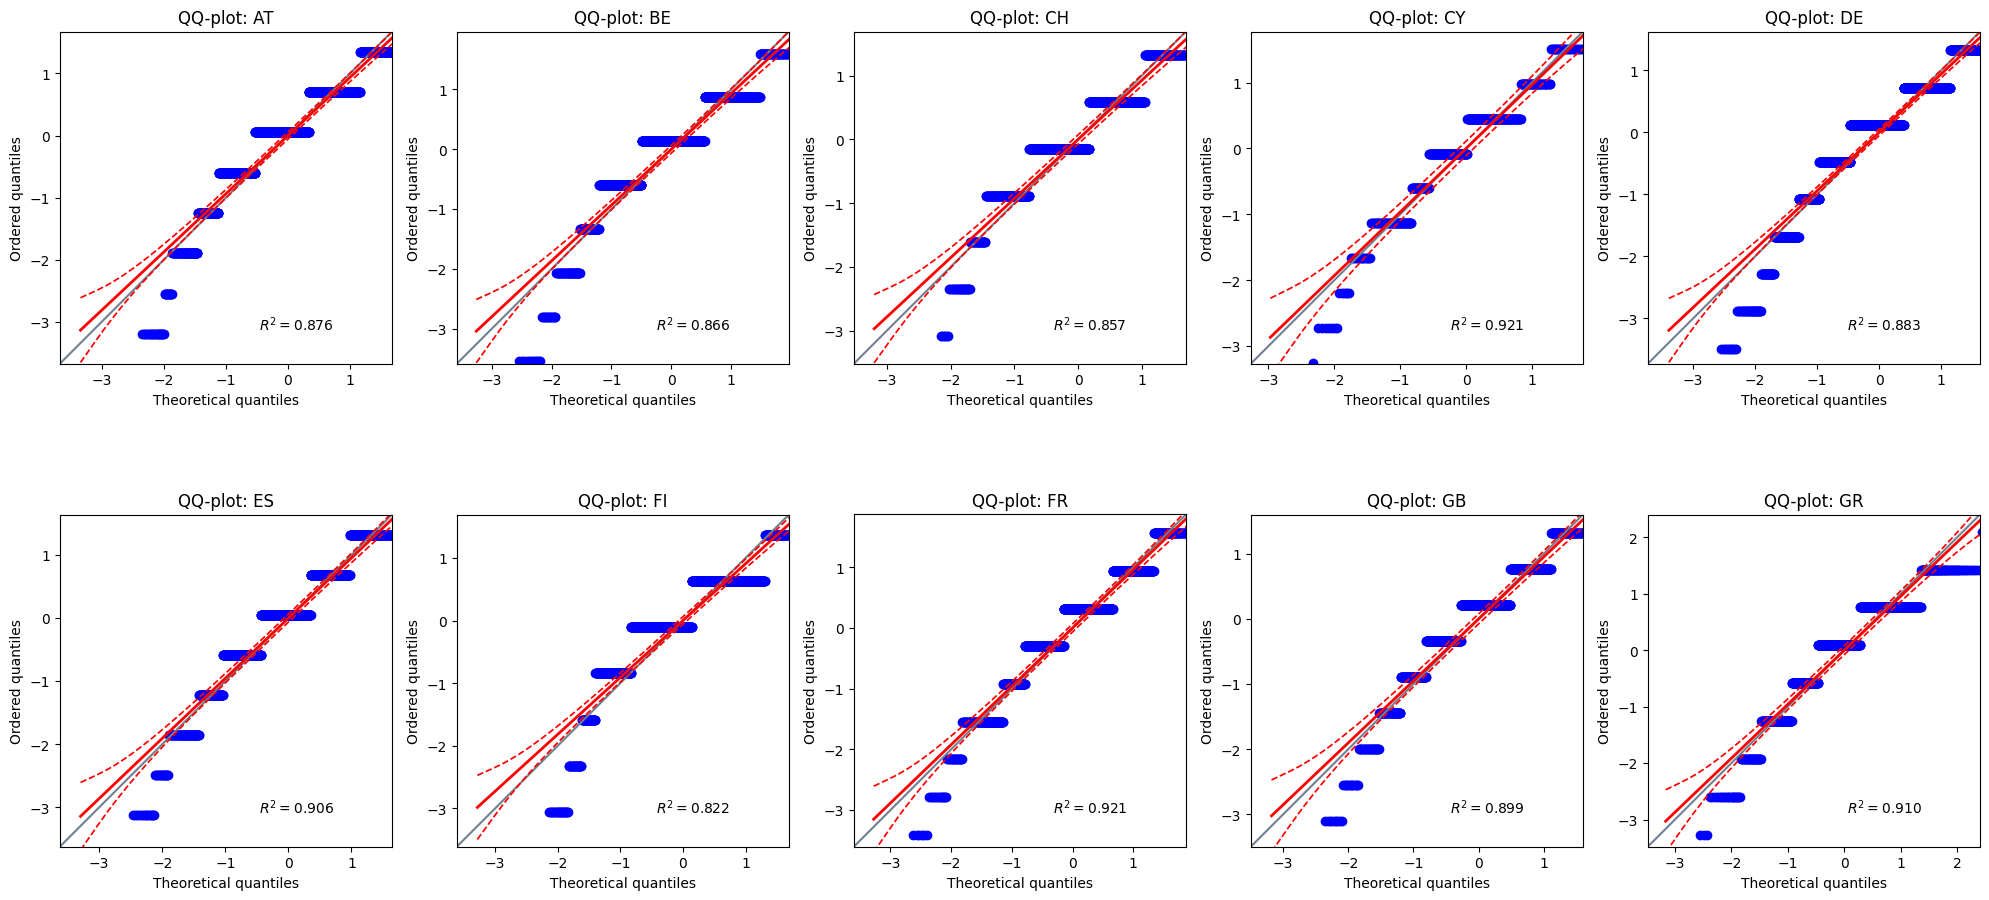

In [33]:
countries = data['cntry'].unique()

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
axes = axes.flatten()


# Для каждой страны строим QQ-plot
for i, country in enumerate(countries):
    d = data[data['cntry'] == country]['happy']
    pg.qqplot(d, dist='norm', ax=axes[i])
    axes[i].set_title(f'QQ-plot: {country}')

plt.tight_layout()
plt.show()

По результатам теста и графикам QQ-plot делаем вывод о ненормальности распределения данных в выборках, соответственно для проверки гипотез применим непараметрический тест Kruskal-Wallis.

In [34]:
result = pg.kruskal(data=data, dv='happy', between='cntry')

# Вывод с гипотезами
print(
    f"H0: Распределения уровня счастья одинаковы во всех странах.\n"
    f"H1: Распределения уровня счастья различаются хотя бы для одной страны.\n"
    f"Результат: H = {result['H'].values[0]:.2f}, p = {result['p-unc'].values[0]:.3e}\n"
    f"Вывод: {'Отвергаем H0' if result['p-unc'].values[0] < 0.05 else 'Нет оснований отвергнуть H0'}."
)

H0: Распределения уровня счастья одинаковы во всех странах.
H1: Распределения уровня счастья различаются хотя бы для одной страны.
Результат: H = 697.80, p = 2.056e-144
Вывод: Отвергаем H0.


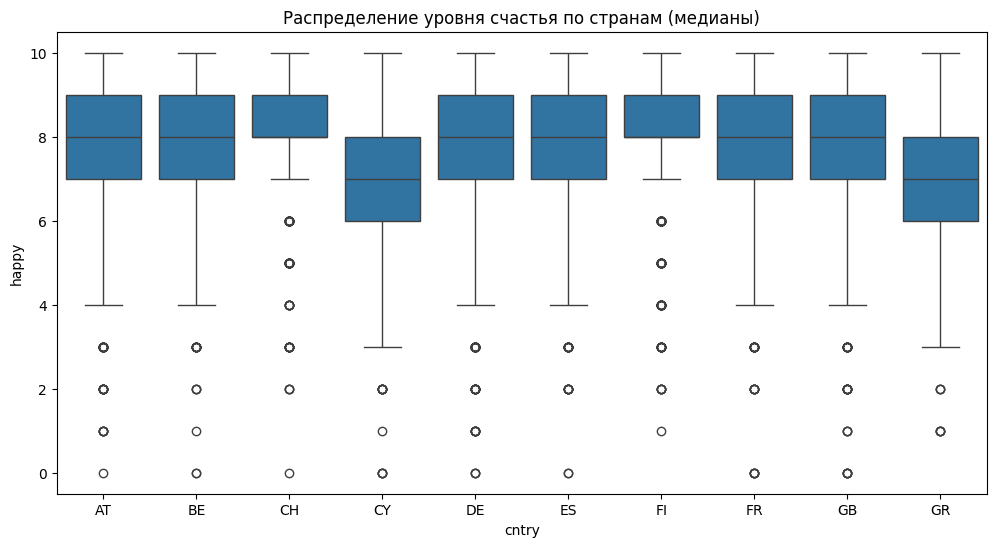

In [35]:
plt.figure(figsize=(12, 6))

sns.boxplot(data=data, x='cntry', y='happy')

plt.title('Распределение уровня счастья по странам (медианы)')
plt.show()

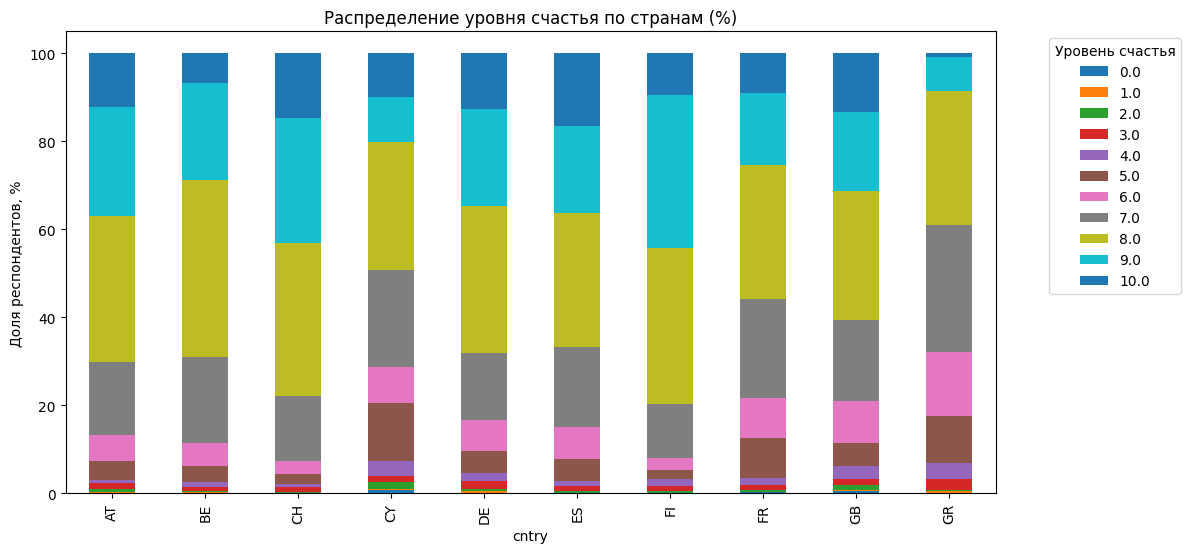

In [36]:
# Построим таблицу сопряженности
df_crosstab_cntry = pd.crosstab(data.cntry, data.happy)
df_percent = df_crosstab_cntry.div(df_crosstab_cntry.sum(axis=1), axis=0) * 100

df_percent.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Распределение уровня счастья по странам (%)')
plt.ylabel('Доля респондентов, %')
plt.legend(title='Уровень счастья', bbox_to_anchor=(1.05, 1))
plt.show()

### Вывод
Мы получили статистически значимые результаты тестов, что распределение уровня счастья различается хотя бы в одной стране. Как видно из графика в Финляднии и Швейцарии большая часть люди с более высоким уровнем счастья, страны с наименьшим уровнем счастья Греция.

## Счастье и занятия спортом

- H0: занятия спортом не влияют на уровень счастья
- H1: занятия спортом влияют на уровень счастья

In [37]:
normality_results = data.groupby('dosprt')['happy'].apply(pg.normality).reset_index()
print(normality_results)

   dosprt  level_1         W          pval  normal
0     0.0      0.0  0.924729  6.402300e-31   False
1     1.0      1.0  0.895441  3.840014e-25   False
2     2.0      2.0  0.891865  2.515014e-31   False
3     3.0      3.0  0.894770  3.267423e-32   False
4     4.0      4.0  0.877717  2.453104e-29   False
5     5.0      5.0  0.875778  1.009866e-29   False
6     6.0      6.0  0.872369  1.527624e-20   False
7     7.0      7.0  0.884854  1.757434e-43   False


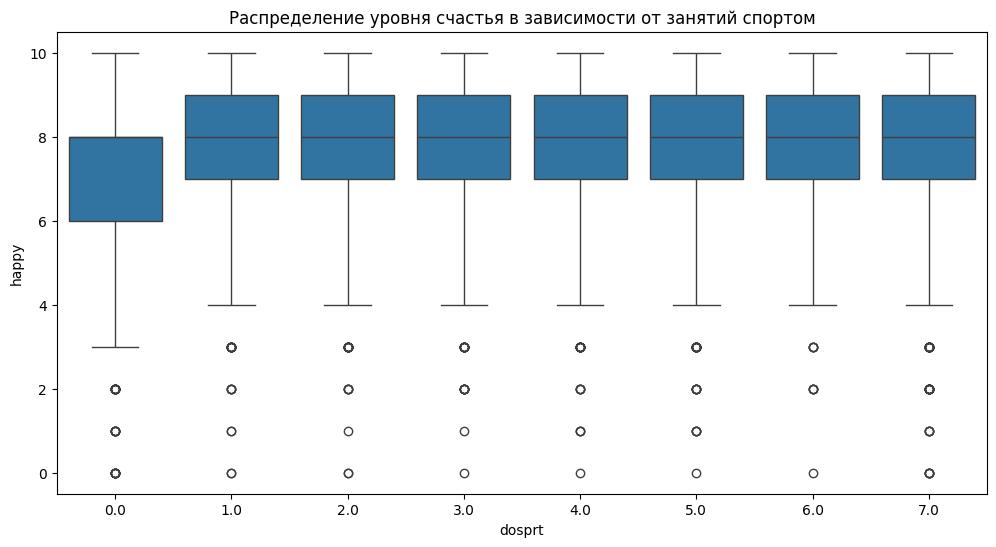

In [38]:
plt.figure(figsize=(12, 6))

sns.boxplot(data=data, x='dosprt', y='happy')

plt.title('Распределение уровня счастья в зависимости от занятий спортом')
plt.show()

In [39]:
pg.corr(data['dosprt'], data['happy'], method='spearman')

,n,r,CI95%,p-val,power
spearman,12242,0.135577,"[0.12, 0.15]",2.598121e-51,1.0


Тест Спирмена показал статистическую значимость существования слабой связи, ρ = 0.136. Из графиков боксплотов видно, что распределение для значения 0 (отсутствия занятия спортом) значительно отличается. Проверим гипотезу влияет ли количество занятий спортом в неделю на уровень спорта.

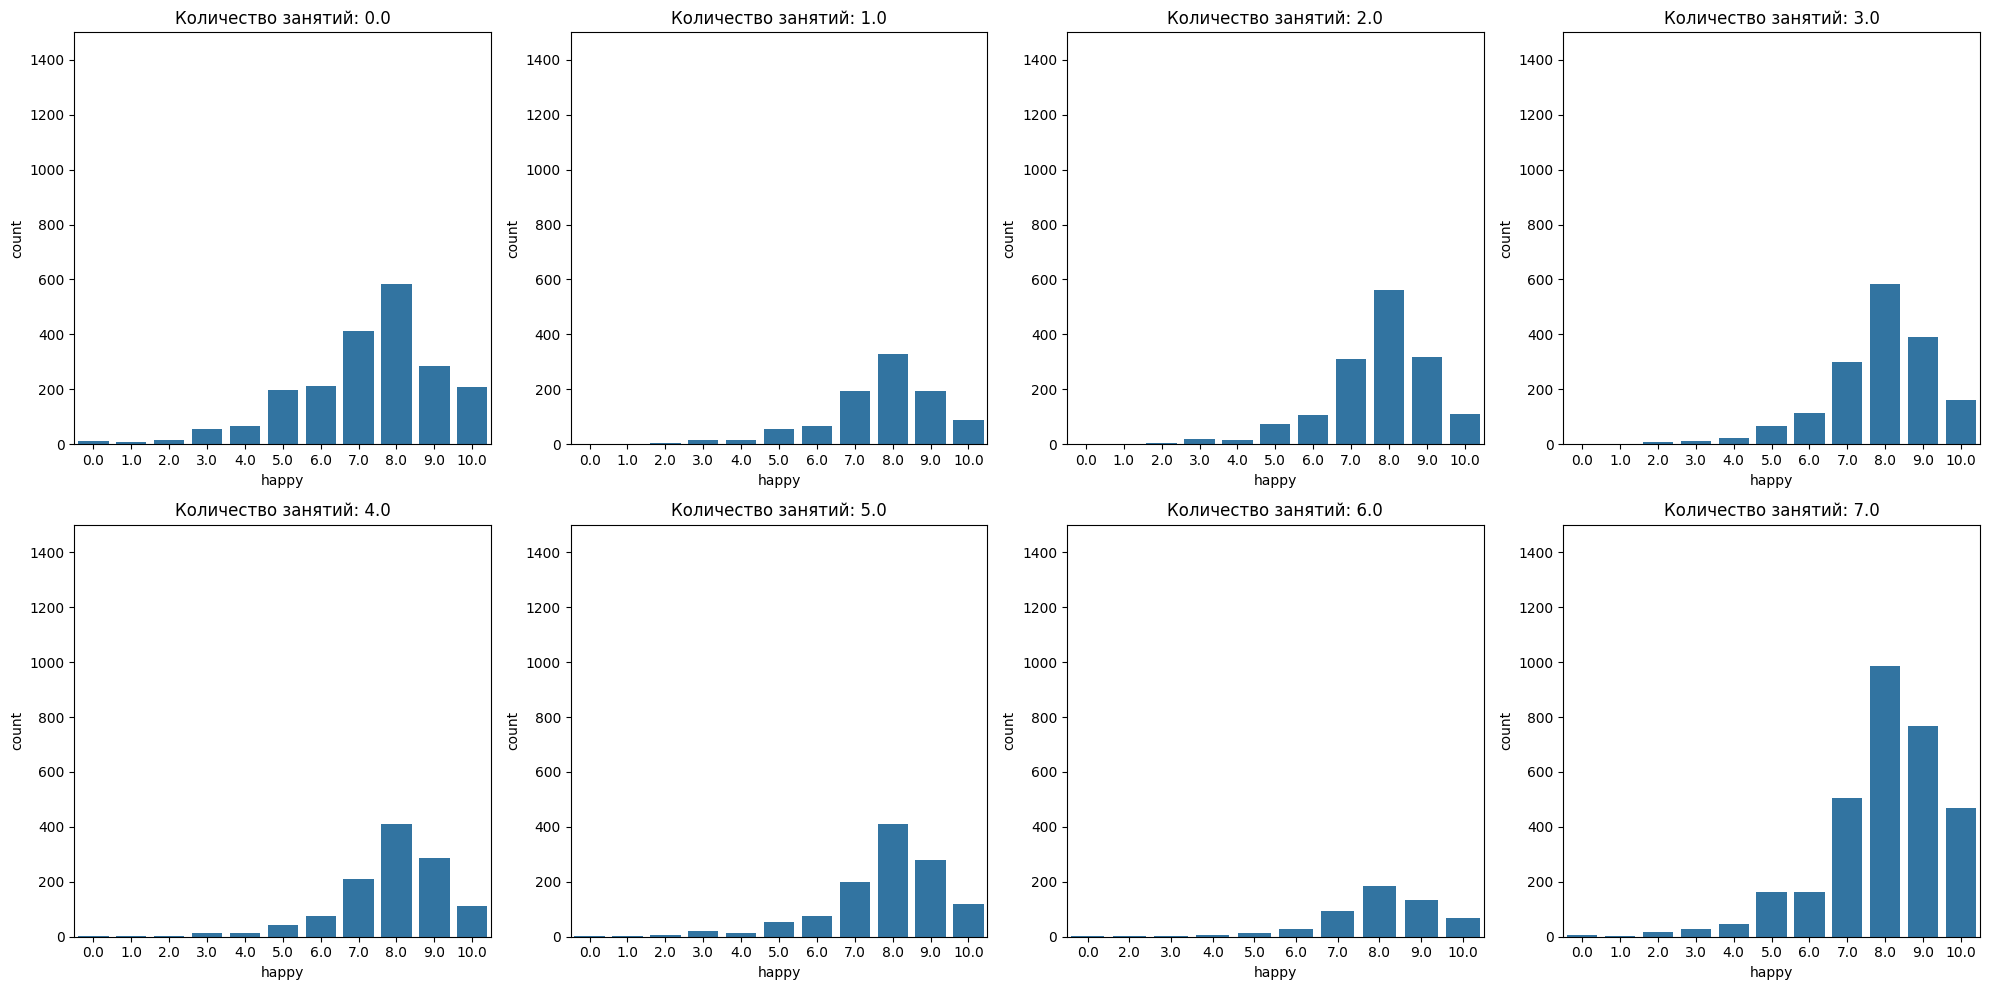

In [40]:
dosrpt_values = sorted(data['dosprt'].unique().astype('object'))

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(dosrpt_values):
    d = data[data['dosprt'] == col]
    sns.countplot(x ='happy', data=d, ax=axes[i])
    axes[i].set_title(f'Количество занятий: {col}')

    axes[i].set_ylim(0, 1500)

plt.tight_layout()
plt.show()

In [41]:
result = pg.kruskal(data=data, dv='happy', between='dosprt')

# Вывод с гипотезами
print(
    f"H0: Распределения уровня счастья одинаковы и не зависимы от количества занятий спортом.\n"
    f"H1: Распределения уровня счастья различаются.\n"
    f"Результат: H = {result['H'].values[0]:.2f}, p = {result['p-unc'].values[0]:.3e}\n"
    f"Вывод: {'Отвергаем H0' if result['p-unc'].values[0] < 0.05 else 'Нет оснований отвергнуть H0'}.")

H0: Распределения уровня счастья одинаковы и не зависимы от количества занятий спортом.
H1: Распределения уровня счастья различаются.
Результат: H = 262.24, p = 6.870e-53
Вывод: Отвергаем H0.


### Вывод
Тест на нормальность показал, что данные распределены не нормально, был проведен непараметрический тест Краскела-Уоллеса, который показал, что распределения уровня счастья различаются хотя бы в одной группе. Тест Спирмена показал слабую положительную связь, статически значимую.

## Счастье и частота употребления алкоголя

- H0: частота употребления алкоголя не влияет на уровень счастья
- H1: частота употребления алкоголя влияет на уровень счастья

In [42]:
normality_results = data.groupby('alcfreq')['happy'].apply(pg.normality).reset_index()
print(normality_results)

   alcfreq  level_1         W          pval  normal
0      1.0      1.0  0.910377  1.451501e-21   False
1      2.0      2.0  0.872908  1.727714e-40   False
2      3.0      3.0  0.895997  2.292594e-38   False
3      4.0      4.0  0.882924  6.314182e-34   False
4      5.0      5.0  0.882584  6.745413e-27   False
5      6.0      6.0  0.893402  1.895955e-32   False
6      7.0      7.0  0.911183  1.374715e-33   False


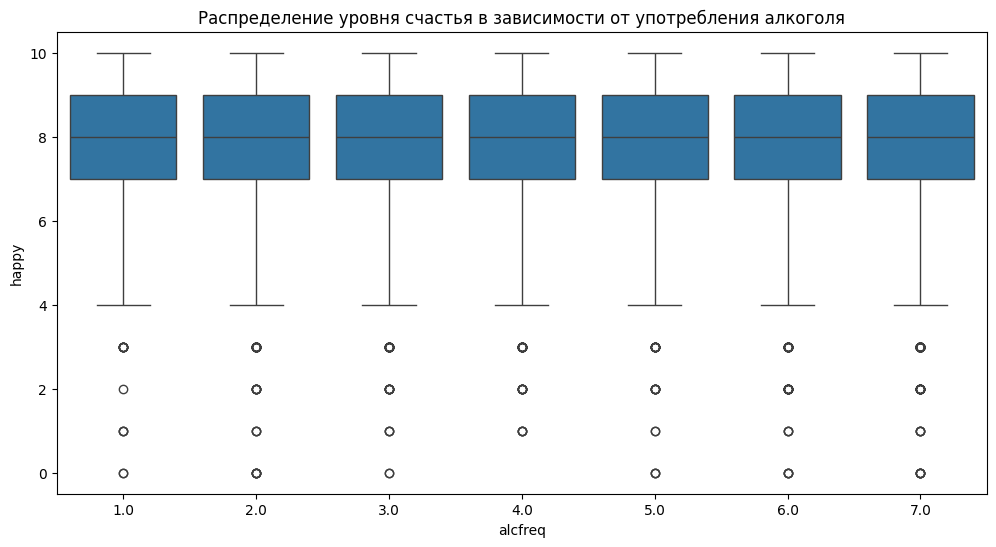

In [43]:
plt.figure(figsize=(12, 6))

sns.boxplot(data=data, x='alcfreq', y='happy')

plt.title('Распределение уровня счастья в зависимости от употребления алкоголя')
plt.show()

Наибольшая частота с высоким уровнем счастья у респондентов употребляют от 1 раза в неделю до 2-3 раз за месяц. На графиках медианное значение одинаково во всех группах.

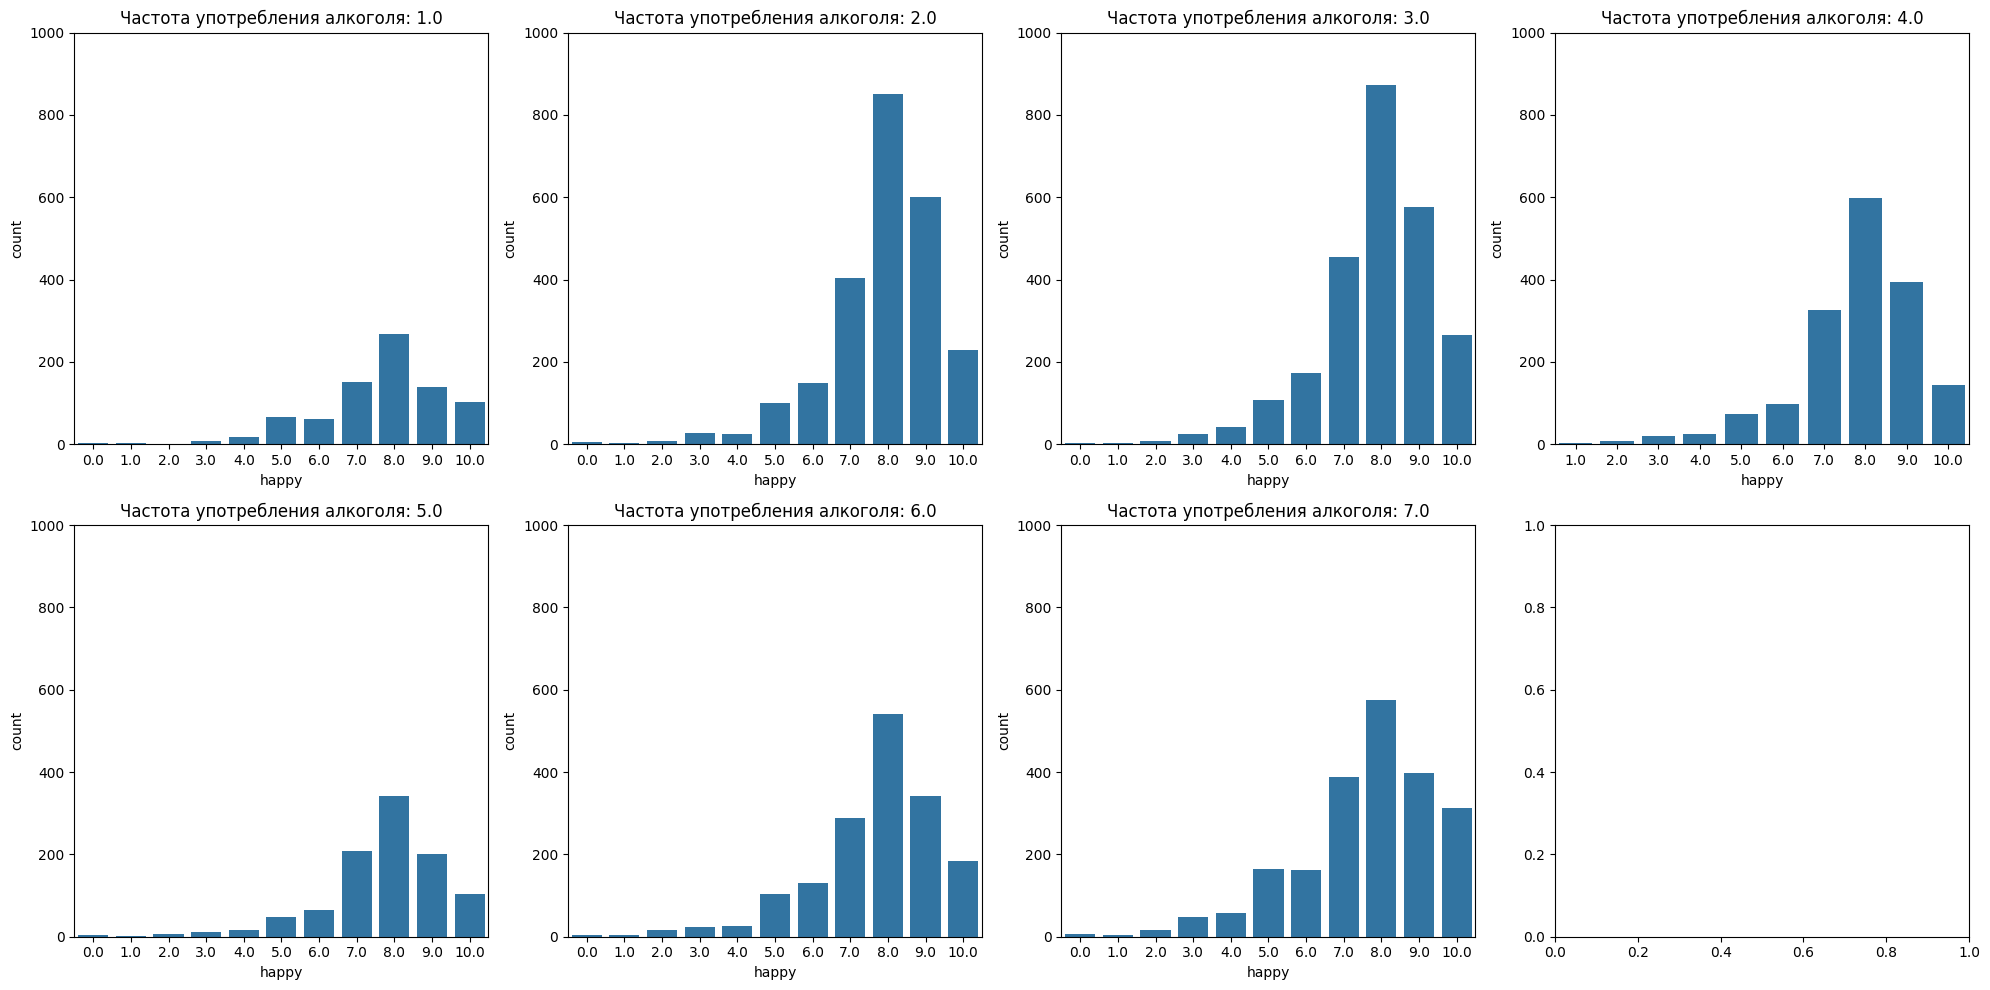

In [44]:
alcfreq_values = sorted(data['alcfreq'].unique().astype('object'))

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(alcfreq_values):
    d = data[data['alcfreq'] == col]
    sns.countplot(x ='happy', data=d, ax=axes[i])
    axes[i].set_title(f'Частота употребления алкоголя: {col}')

    axes[i].set_ylim(0, 1000)

plt.tight_layout()
plt.show()

In [45]:
result = pg.kruskal(data=data, dv='happy', between='alcfreq')

# Вывод с гипотезами
print(
    f"H0: Распределения уровня счастья одинаковы и не зависимы от частоты употребления алкоголя.\n"
    f"H1: Распределения уровня счастья различаются.\n"
    f"Результат: H = {result['H'].values[0]:.2f}, p = {result['p-unc'].values[0]:.3e}\n"
    f"Вывод: {'Отвергаем H0' if result['p-unc'].values[0] < 0.05 else 'Нет оснований отвергнуть H0'}.")

H0: Распределения уровня счастья одинаковы и не зависимы от частоты употребления алкоголя.
H1: Распределения уровня счастья различаются.
Результат: H = 29.31, p = 5.325e-05
Вывод: Отвергаем H0.


In [46]:
pg.corr(data['alcfreq'], data['happy'], method='spearman')

,n,r,CI95%,p-val,power
spearman,12242,-0.032119,"[-0.05, -0.01]",0.000379,0.944615


### Вывод
Тест Краскела-Уоллиса показал, что распределение по частоте употребления алкоголя отличается хотя бы в одной группе. Корреляция Спирмена показала обратную слабую связь r = -0.0321, но статистически значимую. С увеличением значения частоты употребления алкоголя уменьшается уровень счастья. В наших данных значение частоты употребления увеличивается от 1 до 7, где 1- употребление каждый день, а 7 - никогда.

## Счастье и уровень религиозности

- Н0: уровень счастья не зависит от уровня религиозности
- H1: уровень счастья зависит от уровня религиозности

Предпосылки: Религиозные люди могут ощущать себя более счастливыми благодаря поддержке общества и их религиозных сообществ, веры в лучшее будущее и возможные вознаграждения, а так же из-за того, что религиозные практики носят медитативный характер, позволяя снять стресс и настроиться на позитивные мысли.

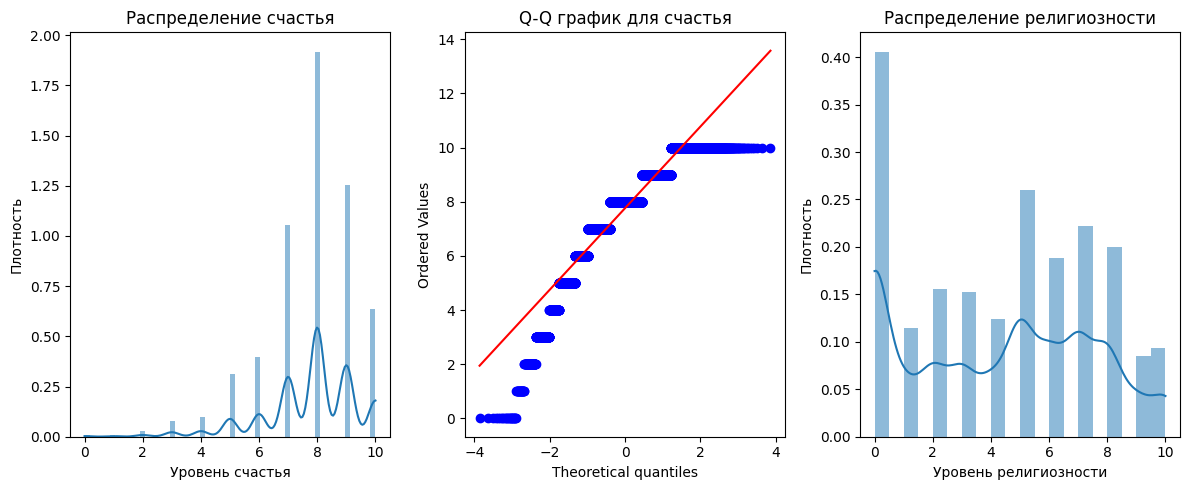

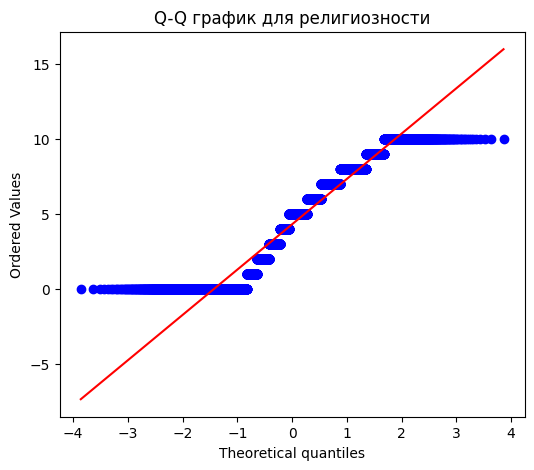

In [47]:
# Приверим нормальность распределения данных: построим гистограммы и Q-Q графики для переменных

# Визуализация распределения счастья
plt.figure(figsize=(12, 5))

# Гистограмма с кривой плотности
plt.subplot(1, 3, 1)
sns.histplot(data['happy'], kde=True, stat="density", linewidth=0)
plt.title('Распределение счастья')
plt.xlabel('Уровень счастья')
plt.ylabel('Плотность')

# Q-Q график для счастья
plt.subplot(1, 3, 2)
ss.probplot(data['happy'], dist="norm", plot=plt)
plt.title('Q-Q график для счастья')

# Визуализация распределения религиозности
plt.subplot(1, 3, 3)
sns.histplot(data['rlgdgr'], kde=True, stat="density", linewidth=0)
plt.title('Распределение религиозности')
plt.xlabel('Уровень религиозности')
plt.ylabel('Плотность')

plt.tight_layout()
plt.show()

# Q-Q график для религиозности
plt.figure(figsize=(6, 5))
ss.probplot(data['rlgdgr'], dist="norm", plot=plt)
plt.title('Q-Q график для религиозности')
plt.show()

Из графиков делаем вывод, что данные распределены не нормально. Разобьём данные на группы: низкий (0-3), средний (4-6), высокий (7-10) уровни религиозности. Далее воспользуемся критерием Краскала-Уоллиса для проверки различий между этими группами.

In [48]:
# Гипотеза 1: Религиозность и счастье
# Разбиваем респондентов на группы по уровням религиозности
data['rlgdgr_cat'] = pd.cut(data['rlgdgr'], bins=[-1, 3, 6, 10], labels=['Низкий', 'Средний', 'Высокий'])

# Критерий Краскала-Уоллиса
h_stat, p_value_religious = ss.kruskal(
    data[data['rlgdgr_cat'] == 'Низкий']['happy'],
    data[data['rlgdgr_cat'] == 'Средний']['happy'],
    data[data['rlgdgr_cat'] == 'Высокий']['happy']
)

print("Гипотеза 1: религиозность и счастье")
print(f"H-статистика: {h_stat}, p-значение: {p_value_religious}")

# Проверяем гипотезу
alpha = 0.05
if p_value_religious < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу")

Гипотеза 1: религиозность и счастье
H-статистика: 23.94550355795974, p-значение: 6.313933001545554e-06
Отвергаем нулевую гипотезу


Text(0, 0.5, 'Уровень счастья')

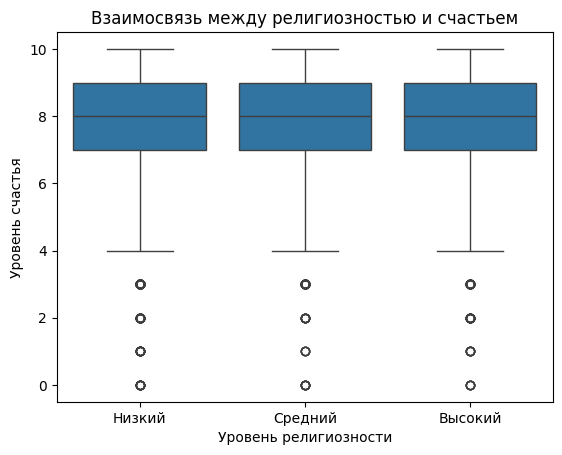

In [49]:
# Посмотрим на графиках взаимосвязи
# Диограмма для религиозности и счастья
sns.boxplot(x='rlgdgr_cat', y='happy', data=data)
plt.title('Взаимосвязь между религиозностью и счастьем')
plt.xlabel('Уровень религиозности')
plt.ylabel('Уровень счастья')

Религиозность и счастье
Коэффициент корреляции: 0.03855702015030618, p-значение: 1.9790845383988675e-05
Отвергаем нулевую гипотезу


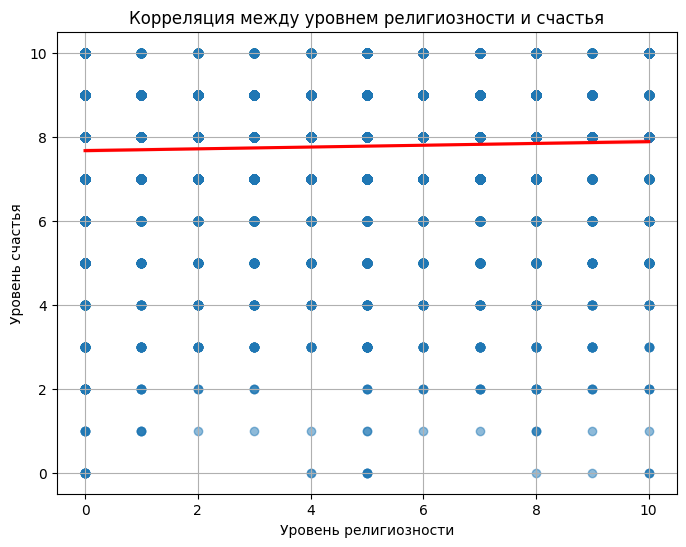

In [50]:
# Корреляция Спирмена для религиозности
spearman_corr_religious = ss.spearmanr(data['rlgdgr'], data['happy'])
print("Религиозность и счастье")
print(f"Коэффициент корреляции: {spearman_corr_religious.correlation}, p-значение: {spearman_corr_religious.pvalue}")

# Проверим гипотезу
alpha = 0.05
if spearman_corr_religious.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу")

# Визуализация корреляции религиозности и счастья
plt.figure(figsize=(8, 6))
sns.regplot(x='rlgdgr', y='happy', data=data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Корреляция между уровнем религиозности и счастья')
plt.xlabel('Уровень религиозности')
plt.ylabel('Уровень счастья')
plt.grid()
plt.show()

### Вывод
Критерий Краскала-Уоллиса показывает, что уровень религиозности влияет на уровень счастья, однако  коэффициент корреляции 0.039 указывает на то, что связь между религиозностью и счастьем положительна и очень слаба, несмотря на статистическую значимость p < 0.05. Это может указывать на то, что в выборке есть группы, которые сильно различаются по уровню счастья/религиозности, но в общем связь между ними не сильная. Например большинство респондентов могут иметь высокий уровень счастья и среди них есть группа с низким уровнем религиозности, тогда это повлияет на результаты. Из этого можем сделать вывод,  счастье не сильно зависит от уровня религиозности.

## Счастье и патриотизм

- H0: уровень счастья не зависит от уровня патриотизма
- H1: уровень счастья зависит от уровня патриотизма

Предпосылки: Патриоты могут ощущать себя более счастливыми из-за того, что патриотизм даёт человеку чувство принадлежности к обществу/нации, мотивирует на активное участие в общественной жизни, соотвественно позволяет вносить свой вклад в общее благо, что помогает справиться с чувством одиночества. Так же эти люди склонны смотреть на собственную жизнь и свои достижения через призму процветания и побед своей страны, что способствует более положительному восприятию себя, более высокой самооценке и общеё удовлетворённостью.

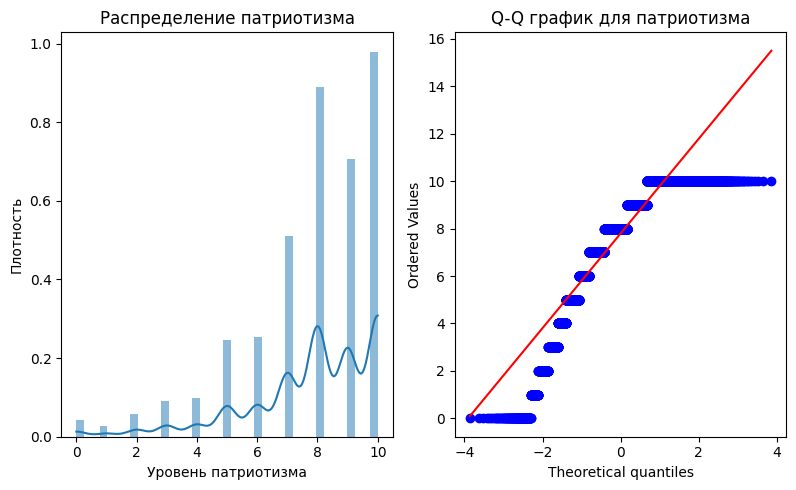

In [51]:
# Визуализация распределения патриотизма
plt.figure(figsize=(12, 5))

# Гистограмма с кривой плотности
plt.subplot(1, 3, 1)
sns.histplot(data['atchctr'], kde=True, stat="density", linewidth=0)
plt.title('Распределение патриотизма')
plt.xlabel('Уровень патриотизма')
plt.ylabel('Плотность')

# Q-Q график для патриотизма
plt.subplot(1, 3, 2)
ss.probplot(data['atchctr'], dist="norm", plot=plt)
plt.title('Q-Q график для патриотизма')

plt.tight_layout()
plt.show()

Из графиков делаем вывод, что данные распределены не нормально. Разобьём данные на группы: низкий (0-3), средний (4-6), высокий (7-10) уровни патриотизма. Далее воспользуемся критерием Краскала-Уоллиса для проверки различий между этими группами.

In [52]:
data['atchctr_cat'] = pd.cut(data['atchctr'], bins=[-1, 3, 6, 10], labels=['Низкий', 'Средний', 'Высокий'])

# Критерий Краскала-Уоллиса
h_stat_pat, p_value_pat = ss.kruskal(
    data[data['atchctr_cat'] == 'Низкий']['happy'],
    data[data['atchctr_cat'] == 'Средний']['happy'],
    data[data['atchctr_cat'] == 'Высокий']['happy']
)

print("Гипотеза 2: патриотизм и счастье")
print(f"H-статистика: {h_stat_pat}, P-значение: {p_value_pat}")

# Проверим гипотезу
if p_value_pat < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу")

Гипотеза 2: патриотизм и счастье
H-статистика: 239.11064765250458, P-значение: 1.1961415596528358e-52
Отвергаем нулевую гипотезу


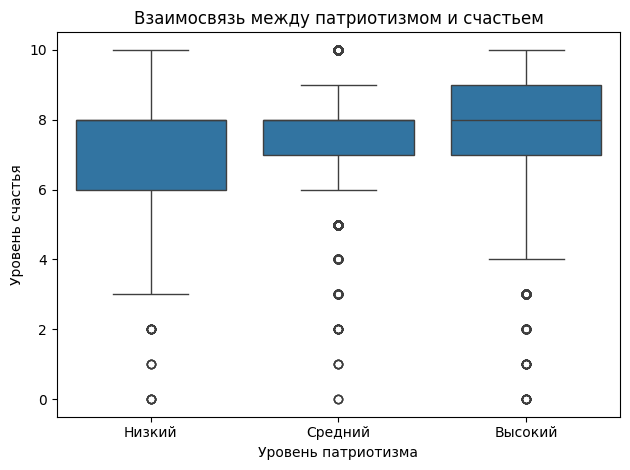

In [53]:
# Диограмма для патриотизма и счастья
sns.boxplot(x='atchctr_cat', y='happy', data=data)
plt.title('Взаимосвязь между патриотизмом и счастьем')
plt.xlabel('Уровень патриотизма')
plt.ylabel('Уровень счастья')

plt.tight_layout()
plt.show()


Патриотизм и счастье
Коэффициент корреляции: 0.1839953545122472, P-значение: 1.1301084775903286e-93
Отвергаем нулевую гипотезу


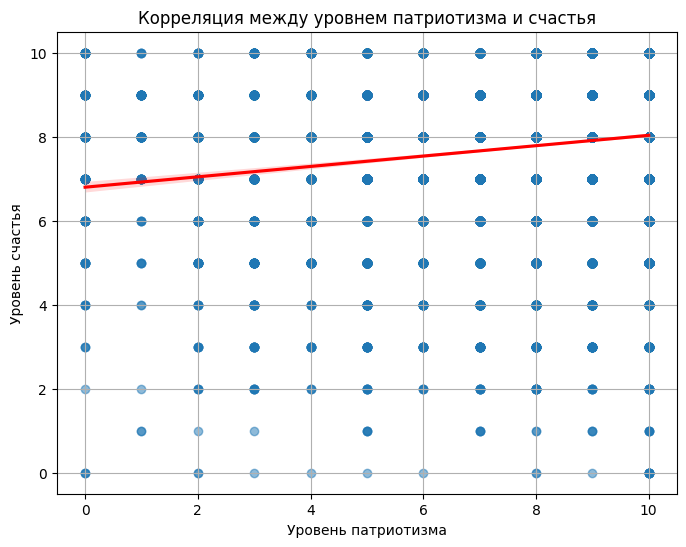

In [54]:
# Корреляция Спирмена для патриотизма
spearman_corr_patriotic = ss.spearmanr(data['atchctr'], data['happy'])
print("\nПатриотизм и счастье")
print(f"Коэффициент корреляции: {spearman_corr_patriotic.correlation}, P-значение: {spearman_corr_patriotic.pvalue}")

# Проверим гипотезу
if spearman_corr_patriotic.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу")

# Визуализация корреляции патриотизма и счастья
plt.figure(figsize=(8, 6))
sns.regplot(x='atchctr', y='happy', data=data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Корреляция между уровнем патриотизма и счастья')
plt.xlabel('Уровень патриотизма')
plt.ylabel('Уровень счастья')
plt.grid()
plt.show()

В случае с влиянием патриотизма на счастье всё более однозначно. Критерий Краскала-Уоллиса показывает, что уровень счастья зависит от уровня патриотизма, что далее подтверждается корреляцией Спирмена. Коэффициент корреляции 0.184 указывает на слабую положительную корреляцию между патриотизмом и счастьем, что говорит о том, что по мере увеличения степени патриотизма уровень счастья тоже увеличивается, что подтверждается графиками. Однако патриотизм не является главным фактором влияющим на уровень счастья.

## Общие выводы

- проверили влияние разных переменных на уровень счастья с использованием корреляции Спирмена, теста Краскела-Уоллиса, теста Манна-Уитни
- выявили стат. значимое влияние следующих факторов: доверие к власти, качество сна, пол, возраст, чувство дохода, кол-во членов в семье, занятия спортом, страна, употребление алкоголя, уровень религиозности, уровень патриотизма

**Интересные моменты:**
- женщины чаще выбирают уровень счастья равный 6-8, в то время как мужчины чаще выбирают 9-10
- корреляция между чувством дохода и уровнем счасться = -0.26, то есть чем хуже финансовое положение, тем ниже уровень счастья
-  большее количество членов семьи совсем немного связано с повышением уровня счастья
- в Финляднии и Швейцарии большая часть людей с более высоким уровнем счастья, страны с наименьшим уровнем счастья Греция
- с увеличением значения частоты употребления алкоголя уменьшается уровень счастья
- по мере увеличения степени патриотизма уровень счастья тоже увеличивается